# Final Project - Python For Data Analysis
---

**Student** - Balcer Chloé - Data Science 1

## Libraries imports
---

In [1]:
# import Library
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

## Data Loading

For this project, the dataset that we will be working with was retrieved from the UCI ( Center for Machine Learning and Intelligent Systems). The dataset contains 20 columns which include input and output video characteristics along with their transcoding videos to different but valid formats. The first 10 columns of fundamental video characteristics for 1.6 million youtube videos; It contains YouTube video id, duration, bitrate(total in Kbits),bitrate(video bitrate in Kbits),
height(in pixle), width(in pixles), framrate, estimated framerate, codec,
category, and direct video link. This dataset can be used to gain insight
in characteristics of consumer videos found on UGC(Youtube).


In [19]:
df = pd.read_csv("transcoding_mesurment.tsv",sep='\t')
df.head()

id   duration  codec  width  height  bitrate  framerate   i     p  \
0  04t6-jw9czg  130.35667  mpeg4    176     144    54590       12.0  27  1537   
1  04t6-jw9czg  130.35667  mpeg4    176     144    54590       12.0  27  1537   
2  04t6-jw9czg  130.35667  mpeg4    176     144    54590       12.0  27  1537   
3  04t6-jw9czg  130.35667  mpeg4    176     144    54590       12.0  27  1537   
4  04t6-jw9czg  130.35667  mpeg4    176     144    54590       12.0  27  1537   

   b  ...  p_size  b_size    size  o_codec  o_bitrate o_framerate  o_width  \
0  0  ...  825054       0  889537    mpeg4      56000        12.0      176   
1  0  ...  825054       0  889537    mpeg4      56000        12.0      320   
2  0  ...  825054       0  889537    mpeg4      56000        12.0      480   
3  0  ...  825054       0  889537    mpeg4      56000        12.0      640   
4  0  ...  825054       0  889537    mpeg4      56000        12.0     1280   

   o_height   umem  utime  
0       144  22508  0.612  
1       240  25164  0.980  
2       360  29228  1.216  
3       480  34316  1.692  
4       720  58528  3.456  

[5 rows x 22 columns]

## Our Mission


Given our dataset, we aim to predict the **transcoding time** (named utime in our dataset) given the rest of data features and show the significance of our dataset. Our target value being a continuous variable, we are facing a **regresssion problem** and will thus try to find the best regression model that fits our data.

## Data Cleaning 
---

We will start our data-preprocessing journey with some data cleaning. More particularly, we will focus here on checking for null or nan values and remove them if they do exist.

In [20]:
# check if there are any NA values
df.isna().any()

id             False
duration       False
codec          False
width          False
height         False
bitrate        False
framerate      False
i              False
p              False
b              False
frames         False
i_size         False
p_size         False
b_size         False
size           False
o_codec        False
o_bitrate      False
o_framerate    False
o_width        False
o_height       False
umem           False
utime          False
dtype: bool

We are lucky to see there is no NA values in our dataset.
Let's have a look on the dataset features caracteristics

Number of rows = 68784
Number of columns = 22

## Checking for null values 
---

In [21]:
total = df.isnull().sum().sort_values(ascending=False)
percent=(df.isnull().sum()/len(df)*100).sort_values(ascending=False)
miss_train_data=pd.concat([total,percent],axis=1,keys=['Total_Null','Percent'])
miss_train_data.head(40).style.background_gradient(cmap='viridis')

What is more, we observe there are no null values. We can thus focus on feature engineering.

In [22]:
df.head()

id   duration  codec  width  height  bitrate  framerate   i     p  \
0  04t6-jw9czg  130.35667  mpeg4    176     144    54590       12.0  27  1537   
1  04t6-jw9czg  130.35667  mpeg4    176     144    54590       12.0  27  1537   
2  04t6-jw9czg  130.35667  mpeg4    176     144    54590       12.0  27  1537   
3  04t6-jw9czg  130.35667  mpeg4    176     144    54590       12.0  27  1537   
4  04t6-jw9czg  130.35667  mpeg4    176     144    54590       12.0  27  1537   

   b  ...  p_size  b_size    size  o_codec  o_bitrate o_framerate  o_width  \
0  0  ...  825054       0  889537    mpeg4      56000        12.0      176   
1  0  ...  825054       0  889537    mpeg4      56000        12.0      320   
2  0  ...  825054       0  889537    mpeg4      56000        12.0      480   
3  0  ...  825054       0  889537    mpeg4      56000        12.0      640   
4  0  ...  825054       0  889537    mpeg4      56000        12.0     1280   

   o_height   umem  utime  
0       144  22508  0.612  
1       240  25164  0.980  
2       360  29228  1.216  
3       480  34316  1.692  
4       720  58528  3.456  

[5 rows x 22 columns]

We can see that the feature **bsize** is set to 1 for each row so we can remove it from the dataset

In [23]:
df.drop(['b_size'], axis=1, inplace=True)

In [24]:
df.describe()

duration         width        height       bitrate     framerate  \
count  68784.000000  68784.000000  68784.000000  6.878400e+04  68784.000000   
mean     286.413921    624.934171    412.572226  6.937015e+05     23.241321   
std      287.257650    463.169069    240.615472  1.095628e+06      7.224848   
min       31.080000    176.000000    144.000000  8.384000e+03      5.705752   
25%      106.765000    320.000000    240.000000  1.343340e+05     15.000000   
50%      239.141660    480.000000    360.000000  2.911500e+05     25.021740   
75%      379.320000    640.000000    480.000000  6.529670e+05     29.000000   
max    25844.086000   1920.000000   1080.000000  7.628466e+06     48.000000   

                  i              p             b         frames        i_size  \
count  68784.000000   68784.000000  68784.000000   68784.000000  6.878400e+04   
mean     100.868312    6531.692210      9.147854    6641.708377  2.838987e+06   
std       84.764791    6075.871744     92.516177    6153.342453  4.325137e+06   
min        7.000000     175.000000      0.000000     192.000000  1.164800e+04   
25%       39.000000    2374.000000      0.000000    2417.000000  3.933950e+05   
50%       80.000000    5515.000000      0.000000    5628.000000  9.458650e+05   
75%      138.000000    9155.000000      0.000000    9232.000000  3.392479e+06   
max     5170.000000  304959.000000   9407.000000  310129.000000  9.082855e+07   

             p_size          size     o_bitrate   o_framerate       o_width  \
count  6.878400e+04  6.878400e+04  6.878400e+04  68784.000000  68784.000000   
mean   2.218057e+07  2.502294e+07  1.395036e+06     21.190862    802.336357   
std    5.097306e+07  5.414402e+07  1.749352e+06      6.668703    609.959797   
min    3.384500e+04  1.918790e+05  5.600000e+04     12.000000    176.000000   
25%    1.851539e+06  2.258222e+06  1.090000e+05     15.000000    320.000000   
50%    6.166260e+06  7.881069e+06  5.390000e+05     24.000000    480.000000   
75%    1.515506e+07  1.977335e+07  3.000000e+06     25.000000   1280.000000   
max    7.689970e+08  8.067111e+08  5.000000e+06     29.970000   1920.000000   

           o_height           umem         utime  
count  68784.000000   68784.000000  68784.000000  
mean     503.825541  228224.717900      9.996355  
std      315.970438   97430.878373     16.107429  
min      144.000000   22508.000000      0.184000  
25%      240.000000  216820.000000      2.096000  
50%      360.000000  219480.000000      4.408000  
75%      720.000000  219656.000000     10.433000  
max     1080.000000  711824.000000    224.574000

In [25]:
pred_x = df.drop('utime', axis=1)

## Dropping useless columns
***

Here, we'll try to look deeper in our dataset to analyse if there is any feature with is not relevant with our goal of predicting the utime value given our data.
We start by removing the ids which for evident reason do not bring any information to our study as there are all different for each row of the dataset.

In [26]:
df_cleaned = df.drop(columns=['id'], axis=1)
df_cleaned.head()

duration  codec  width  height  bitrate  framerate   i     p  b  frames  \
0  130.35667  mpeg4    176     144    54590       12.0  27  1537  0    1564   
1  130.35667  mpeg4    176     144    54590       12.0  27  1537  0    1564   
2  130.35667  mpeg4    176     144    54590       12.0  27  1537  0    1564   
3  130.35667  mpeg4    176     144    54590       12.0  27  1537  0    1564   
4  130.35667  mpeg4    176     144    54590       12.0  27  1537  0    1564   

   i_size  p_size    size o_codec  o_bitrate  o_framerate  o_width  o_height  \
0   64483  825054  889537   mpeg4      56000         12.0      176       144   
1   64483  825054  889537   mpeg4      56000         12.0      320       240   
2   64483  825054  889537   mpeg4      56000         12.0      480       360   
3   64483  825054  889537   mpeg4      56000         12.0      640       480   
4   64483  825054  889537   mpeg4      56000         12.0     1280       720   

    umem  utime  
0  22508  0.612  
1  25164  0.980  
2  29228  1.216  
3  34316  1.692  
4  58528  3.456

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68784 entries, 0 to 68783
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           68784 non-null  object 
 1   duration     68784 non-null  float64
 2   codec        68784 non-null  object 
 3   width        68784 non-null  int64  
 4   height       68784 non-null  int64  
 5   bitrate      68784 non-null  int64  
 6   framerate    68784 non-null  float64
 7   i            68784 non-null  int64  
 8   p            68784 non-null  int64  
 9   b            68784 non-null  int64  
 10  frames       68784 non-null  int64  
 11  i_size       68784 non-null  int64  
 12  p_size       68784 non-null  int64  
 13  size         68784 non-null  int64  
 14  o_codec      68784 non-null  object 
 15  o_bitrate    68784 non-null  int64  
 16  o_framerate  68784 non-null  float64
 17  o_width      68784 non-null  int64  
 18  o_height     68784 non-null  int64  
 19  umem

Here, we can see we have three categorical values : id, codec and o_codec.
We can encode categorical values into integers with dummies encoding.

In [28]:
df_cleaned_dm = pd.get_dummies(df_cleaned)


duration  width  height  bitrate  framerate    i      p  b  frames  \
0      130.35667    176     144    54590  12.000000   27   1537  0    1564   
1      130.35667    176     144    54590  12.000000   27   1537  0    1564   
2      130.35667    176     144    54590  12.000000   27   1537  0    1564   
3      130.35667    176     144    54590  12.000000   27   1537  0    1564   
4      130.35667    176     144    54590  12.000000   27   1537  0    1564   
...          ...    ...     ...      ...        ...  ...    ... ..     ...   
68779  972.27100    480     360   278822  29.000000  560  28580  0   29140   
68780  129.88100    640     480   639331  30.162790   36   3855  0    3891   
68781  249.68000    320     240   359345  25.068274  129   6113  0    6242   
68782  183.62334   1280     720  2847539  29.000000   98   5405  0    5503   
68783  294.61334    176     144    55242  12.000000   61   3474  0    3535   

        i_size  ...    umem   utime  codec_flv  codec_h264  codec_mpeg4  \
0        64483  ...   22508   0.612          0           0            1   
1        64483  ...   25164   0.980          0           0            1   
2        64483  ...   29228   1.216          0           0            1   
3        64483  ...   34316   1.692          0           0            1   
4        64483  ...   58528   3.456          0           0            1   
...        ...  ...     ...     ...        ...         ...          ...   
68779  7324628  ...   88692   1.552          0           1            0   
68780   875784  ...  107524  18.557          0           0            0   
68781  1758664  ...   88708   0.752          0           0            0   
68782  5246294  ...   88724   5.444          0           1            0   
68783    84002  ...   88736   3.076          0           0            1   

       codec_vp8  o_codec_flv  o_codec_h264  o_codec_mpeg4  o_codec_vp8  
0              0            0             0              1            0  
1              0            0             0              1            0  
2              0            0             0              1            0  
3              0            0             0              1            0  
4              0            0             0              1            0  
...          ...          ...           ...            ...          ...  
68779          0            1             0              0            0  
68780          1            0             0              1            0  
68781          1            1             0              0            0  
68782          0            0             0              1            0  
68783          0            0             1              0            0  

[68784 rows x 26 columns]

In [36]:
dm_x = df_cleaned_dm.drop('utime', axis=1)

In [37]:
y = df['utime']
y.values

array([0.612, 0.98 , 1.216, ..., 0.752, 5.444, 3.076])

In [31]:
dm_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68784 entries, 0 to 68783
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   duration       68784 non-null  float64
 1   width          68784 non-null  int64  
 2   height         68784 non-null  int64  
 3   bitrate        68784 non-null  int64  
 4   framerate      68784 non-null  float64
 5   i              68784 non-null  int64  
 6   p              68784 non-null  int64  
 7   b              68784 non-null  int64  
 8   frames         68784 non-null  int64  
 9   i_size         68784 non-null  int64  
 10  p_size         68784 non-null  int64  
 11  size           68784 non-null  int64  
 12  o_bitrate      68784 non-null  int64  
 13  o_framerate    68784 non-null  float64
 14  o_width        68784 non-null  int64  
 15  o_height       68784 non-null  int64  
 16  umem           68784 non-null  int64  
 17  codec_flv      68784 non-null  uint8  
 18  codec_

## Data Visualization
---

Let's first compute a heatmap exspressing correlations between variables so that we can have a look on the relationship between the target feature: utime and the rest of the data. 
We can recall that positively correlated features depend on each other while negatively correlated features do not.

<AxesSubplot:>

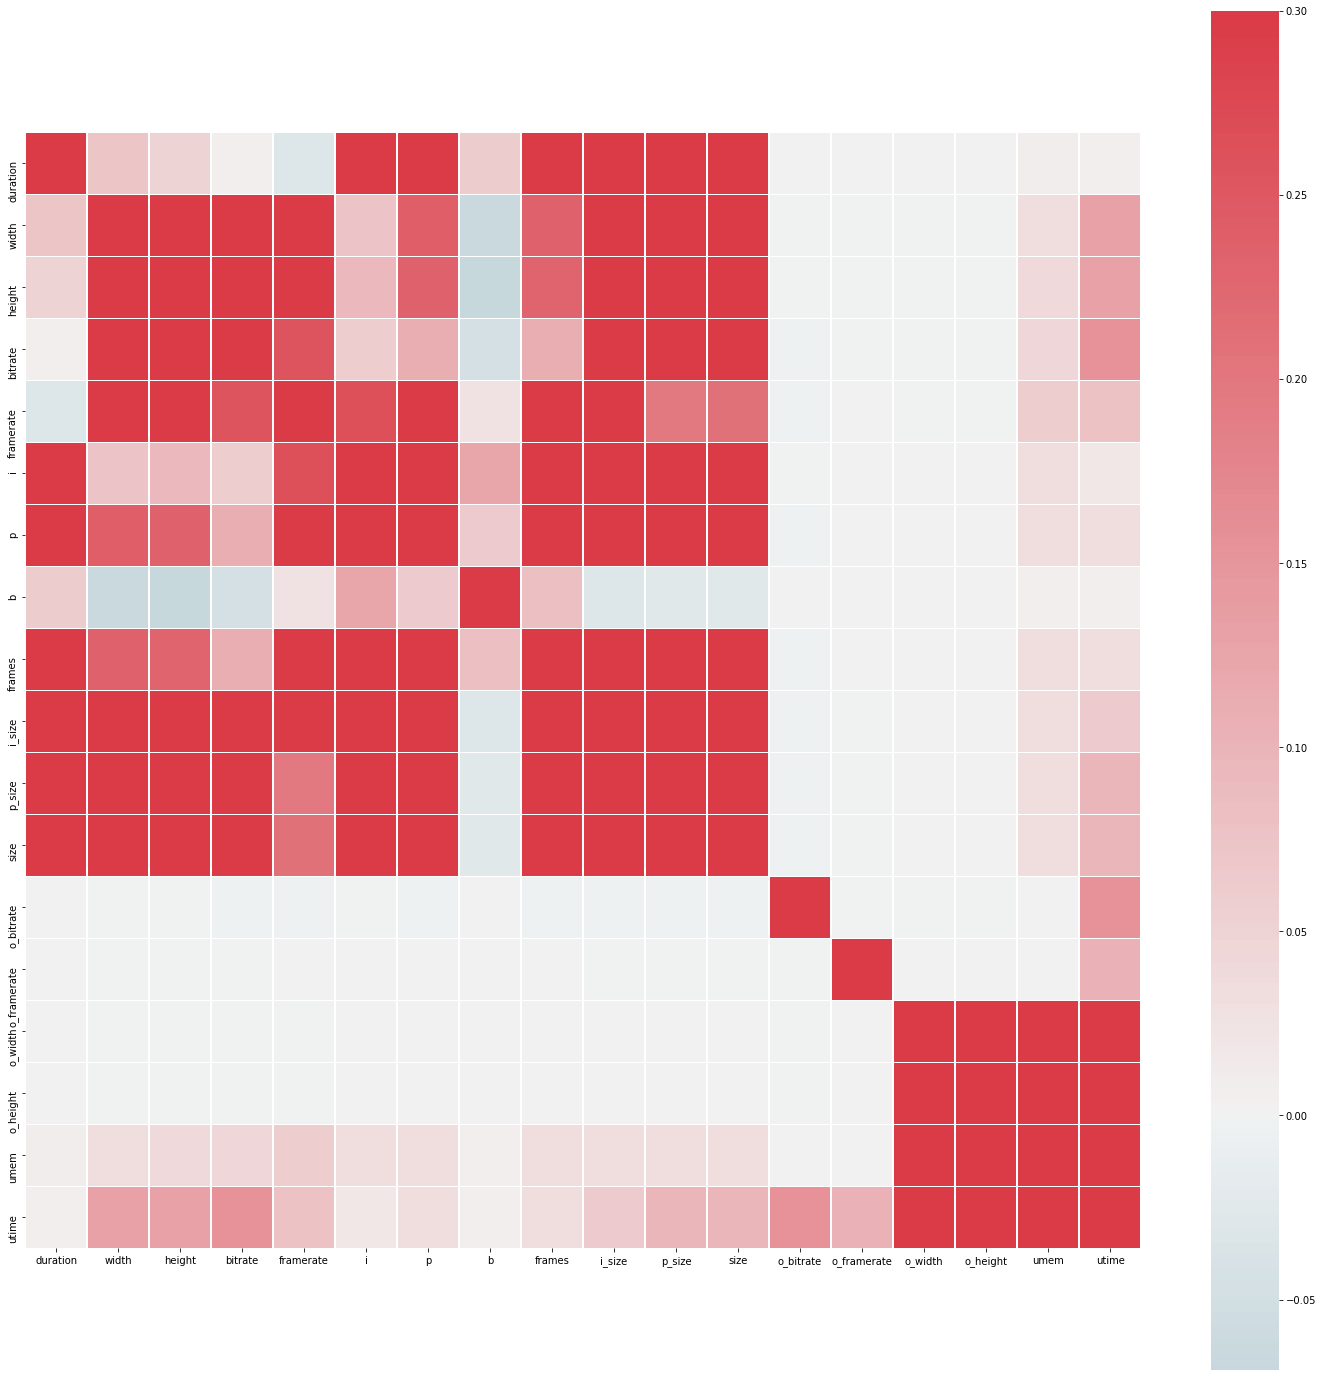

In [120]:
import seaborn as sns

import matplotlib.pyplot as plt


corr = df.corr()
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5)

After ploting our correlation matrix, we notice that the feature b : the number of b frames in the video is neither correlated to our target value nor to other features. Therefore, we can decide to delete this feature from our dataset. 

In [ ]:
# dropping b feature variable
df_cleaned = df.drop(columns=['b'], axis=1)
df_cleaned.head()

## Distribution of target value : utime
---

By plotting the distribution of our target value, we aim to see if our dataset is imbalanced or not, that is to say we want to know if we have underrepresent range of values.

Text(0, 0.5, 'Youtube videos')

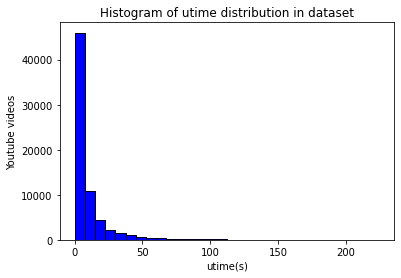

In [32]:
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib histogram
plt.hist(y, color = 'blue', edgecolor = 'black',
         bins = 30)

# seaborn histogram
sns.distplot(y, hist=True, kde=False, 
             bins=30, color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of utime distribution in dataset')
plt.xlabel('utime(s)')
plt.ylabel('Youtube videos')

We can notice in the representation above that the data is imbalanced as most of it is in the range 0 to 10 seconds.
While the best option was to use a library called smogn to make the data more balanced, the result could not be computed in jupyter notebook.


## Split dataset into training/testing sets
---

In [152]:
from sklearn.model_selection import train_test_split
trainset, testset = train_test_split(df_cleaned_dm[:].values, test_size=0.20,random_state=10)
subtrainset, valset = train_test_split(trainset, test_size=0.20,random_state=10)

In [153]:
X_train = trainset[:,:-1]
y_train = trainset[:,-1]
X_test = testset[:,:-1]
y_test = testset[:,-1]

In [154]:
X_subtrain = subtrainset[:,:-1]
y_subtrain = subtrainset[:,-1]
X_val = valset[:,:-1]
y_val = valset[:,-1]

### Feature selection in training data

In [155]:
df.shape

(68784, 21)

The given dataset contains 18 feature variables (excluding 3 variables that were removed previously).
Here we wil perform feature selection to distill the feaures that contain the most useful information while eliminating as much noise (useless information) as possible.

### Feature selection 

In [160]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(dm_x, y, test_size=0.20,random_state=10)
subtrain_x, val_x,subtrain_y, val_y = train_test_split(train_x,train_y, test_size=0.20,random_state=10)


#### Lasso Regression

In [161]:
# Lasso Regression

from sklearn.linear_model import Lasso

#Instantiate object

lasso = Lasso()

# Fit model to training data
lasso = lasso.fit(train_x, train_y)

# Predict
y_pred_lasso = lasso.predict(test_x)

# Score It
from sklearn import metrics
print('Linear Regression Performance')
print('MAE',metrics.mean_absolute_error(test_y, y_pred_lasso))
print('MSE',metrics.mean_squared_error(test_y, y_pred_lasso))
print('RMSE',np.sqrt(metrics.mean_squared_error(test_y, y_pred_lasso)))
print('R^2 =',metrics.explained_variance_score(test_y,y_pred_lasso))

# Lasso Coefficients
pd.set_option('display.float_format', lambda x: '%.2f' % x)
cdf = pd.DataFrame(data = lasso.coef_,index = train_x.columns, columns = ['Lasso Coefficients'])
# **RANDOM FOREST**
cdf.sort_values(by = 'Lasso Coefficients', ascending = False)

Linear Regression Performance
MAE 6.161379790230028
MSE 103.77867652291972
RMSE 10.18718197162099
R^2 = 0.6036236319305129


Lasso Coefficients
o_codec_h264                 0.85
o_framerate                  0.23
framerate                    0.03
width                        0.01
o_width                      0.01
o_height                     0.01
b                            0.00
p                            0.00
umem                         0.00
bitrate                      0.00
o_bitrate                    0.00
frames                       0.00
p_size                       0.00
codec_mpeg4                 -0.00
codec_vp8                   -0.00
codec_h264                   0.00
o_codec_mpeg4               -0.00
o_codec_vp8                  0.00
codec_flv                   -0.00
size                        -0.00
i_size                      -0.00
duration                    -0.00
i                           -0.00
height                      -0.01
o_codec_flv                 -1.73

 Our lasso model gave us a quiet poor performance as the R2 score is low (0.6) and the Mean Squared Error is too big (103).
 That could be an indication that the data is not linearly separable. Yet, it is interesting to compute the lasso coefficients given above so that we can compare them with further model exploration.

### Univariate Feature selection
---

With the aim of finding the right model that fits our data, we'll continue with a non-linear model: Random Forest.
First, we'll try a univariate approach with slects the vraibles most related to the target (utime) through univariate statistical tests. We'll use f_regression as an association metric as it is the one used for numeric targets and based on linear regression performance.

In [138]:
# Select top 20% of features

# Create matrix of x features
X = dm_x

# Feature Selector
# Import
from sklearn.feature_selection import SelectPercentile, f_regression

# Instantiate object
selector_f = SelectPercentile(f_regression, percentile=40)

# Fit and transform
x_best = selector_f.fit_transform(X, y)

### Pareto Approach
---

In choosing the percentile cutoff, I took a Pareto approach and selected the top 40% best, associated features. 

In [140]:
support = np.asarray(selector_f.get_support())

# Enable scientific notation
pd.set_option('display.float_format', '{:.2e}'.format)

# Column names of top 40%
features = np.asarray(X.columns.values)
features_with_support = features[support]

#f-scores of top 40%
fscores = np.asarray(selector_f.scores_)
fscores_with_support = fscores[support]

# p-values of top 40%
pvalues = np.asarray(selector_f.pvalues_)
pvalues_with_support = pvalues[support]

# Dataframe of top 40%
top40 = pd.DataFrame({'F-score':fscores_with_support,
                      'p-value':pvalues_with_support},
                     index = features_with_support)
# top40.index.name = 'Feature'
print('Top 40% best associated features to utime\nNumber of features:',len(features_with_support))
print(top40.sort_values(by = 'p-value', ascending = 'True'))


Top 40% best associated features to utime
Number of features: 10
               F-score   p-value
bitrate       1.70e+03  0.00e+00
o_bitrate     1.70e+03  0.00e+00
o_width       2.60e+04  0.00e+00
o_height      2.54e+04  0.00e+00
umem          5.40e+04  0.00e+00
o_codec_flv   5.35e+03  0.00e+00
o_codec_h264  1.29e+04  0.00e+00
o_codec_mpeg4 2.06e+03  0.00e+00
width         1.18e+03 2.21e-256
height        1.15e+03 5.96e-251


**Statistical Signifiance**

The top 20% of features are all statistically significant as their p-values are far under .05. This further confirms that these features will be good to use in predicting utime.

#### Feature to feature correlation

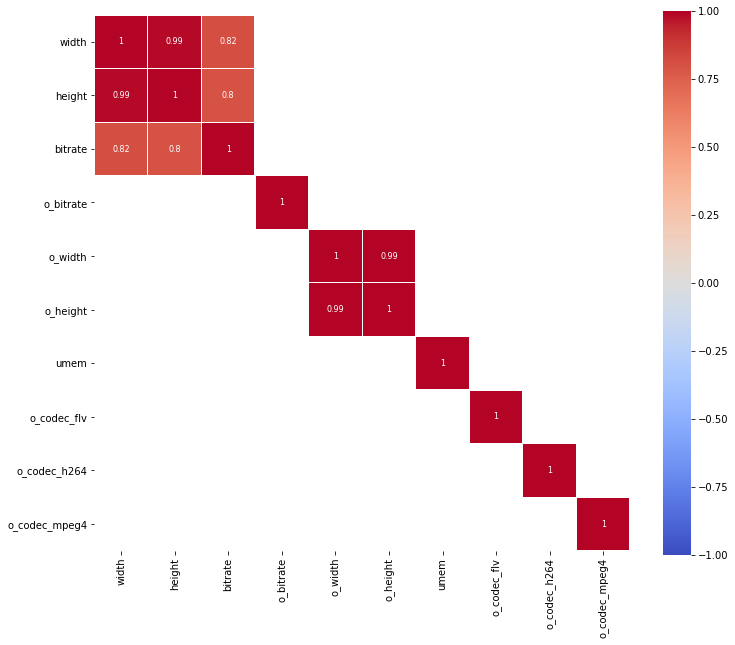

In [143]:
best_feat = df_cleaned_dm[features_with_support]
corr =best_feat.corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.7) | (corr <= -0.7)], 
            cmap='coolwarm', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

There are a few variables that are highly correlated (correlation >.80) with one another. For exmaple, height and width (and o_weight and o_width) are highly correlated, as well as bitrate with both height and width. The features representing redundant information and are less correlated with SalePrice can also be removed for further dimentionality reduction.

In [147]:
# Correlations to SalePrice
from scipy import stats
print('Correlation to SalePrice')
print('width:',stats.pearsonr(best_feat['width'],df['utime'])[0])
print('height:',stats.pearsonr(best_feat['height'],df['utime'])[0])
print('--'*40)
print('o_width:',stats.pearsonr(best_feat['o_width'],df['utime'])[0])
print('o_height:',stats.pearsonr(best_feat['o_height'],df['utime'])[0])
print('--'*40)
print('bitrate:',stats.pearsonr(best_feat['bitrate'],df['utime'])[0])
print('width:',stats.pearsonr(best_feat['width'],df['utime'])[0])

Correlation to SalePrice
width: 0.1298610917449379
height: 0.12847852022519077
--------------------------------------------------------------------------------
o_width: 0.5233876618627901
o_height: 0.519648679239092
--------------------------------------------------------------------------------
bitrate: 0.15519993836948898
width: 0.1298610917449379


**Removing Duplicated Features**

Height VS width
These features are highly correlated with a correlation of 0.99. Of these two variables, height will be removed because it has a lower correlation with utime. Similarly, I choose o_width for further analysis.

Bitrate vs width
Bitrate and width are also highly correlated as indicated by their correlation coefficient of 0.82. width will be removed as it has a lower correlation with our target variable, utime.

Conclusion: we will remove height and width as they represent redundant information.

In [162]:
# dropping b feature variable
clean_features = df_cleaned_dm.drop(columns=['height'], axis=1)
clean_features = df_cleaned_dm.drop(columns=['width'], axis=1)
clean_features = df_cleaned_dm.drop(columns=['b'], axis=1)
clean_features.head()

duration  width  height  bitrate  framerate   i     p  frames  i_size  \
0    130.36    176     144    54590      12.00  27  1537    1564   64483   
1    130.36    176     144    54590      12.00  27  1537    1564   64483   
2    130.36    176     144    54590      12.00  27  1537    1564   64483   
3    130.36    176     144    54590      12.00  27  1537    1564   64483   
4    130.36    176     144    54590      12.00  27  1537    1564   64483   

   p_size  ...   umem  utime  codec_flv  codec_h264  codec_mpeg4  codec_vp8  \
0  825054  ...  22508   0.61          0           0            1          0   
1  825054  ...  25164   0.98          0           0            1          0   
2  825054  ...  29228   1.22          0           0            1          0   
3  825054  ...  34316   1.69          0           0            1          0   
4  825054  ...  58528   3.46          0           0            1          0   

   o_codec_flv  o_codec_h264  o_codec_mpeg4  o_codec_vp8  
0            0             0              1            0  
1            0             0              1            0  
2            0             0              1            0  
3            0             0              1            0  
4            0             0              1            0  

[5 rows x 25 columns]

### Scaling
---

In [163]:
sc = MinMaxScaler()
X = sc.fit_transform(clean_features)
X

array([[0.00384599, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.00384599, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.00384599, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.0084686 , 0.08256881, 0.1025641 , ..., 0.        , 0.        ,
        0.        ],
       [0.00590955, 0.63302752, 0.61538462, ..., 0.        , 1.        ,
        0.        ],
       [0.01020932, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ]])

## Building the model 

In [169]:
from sklearn.model_selection import train_test_split
trainset, testset = train_test_split(clean_features[:].values, test_size=0.20,random_state=10)
subtrainset, valset = train_test_split(trainset, test_size=0.20,random_state=10)


In [174]:
X_train = trainset[:,:-1]
y_train = trainset[:,-1]
X_test = testset[:,:-1]
y_test = testset[:,-1]

In [175]:
X_subtrain = subtrainset[:,:-1]
y_subtrain = subtrainset[:,-1]
X_val = valset[:,:-1]
y_val = valset[:,-1]

### XGBoost model Implementation

---

In [176]:
from xgboost import XGBRegressor

reg= XGBRegressor()
reg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [177]:
pred=reg.predict(X_val)
pred

array([9.9998313e-01, 5.6408999e-06, 9.9998313e-01, ..., 5.6408653e-06,
       9.9998313e-01, 5.6407571e-06], dtype=float32)

In [178]:
from sklearn import metrics

mse = metrics.mean_squared_error(pred, y_val)
mse

9.618015718117677e-11

In [179]:
from sklearn.metrics import accuracy_score,r2_score
score=r2_score(y_val,pred)
score

0.9999999994933025

In [185]:
from sklearn.model_selection import GridSearchCV
def hyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
    }

    xgb_model = reg

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           scoring = 'neg_mean_squared_error',  
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_

In [186]:
hyperParameterTuning(X_subtrain, y_subtrain)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 1,
 'n_estimators': 500,
 'objective': 'reg:squarederror',
 'subsample': 0.7}

In [116]:
y_pred = reg.predict(X_test)

In [117]:
mse_pred = metrics.mean_squared_error(y_pred, y_test)
mse_pred

9.587479556690783e-11

In [118]:
score=r2_score(y_test,y_pred)
score

0.999999999493325

In [99]:
import joblib
import pickle

filename = 'xgb_model_new.pkl'
joblib.dump(reg, filename)


['xgb_model_new.pkl']

## Random Forest
---

Next, we'll try another model: Radom Forest to compare its performance with XGBoost.

In [182]:
# Random Forest Regression with Best Features
# Split
# Create matrix of best x features
X_best = clean_features

# Split training data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_best,y, test_size = .20,random_state = 101)

# Fit
from sklearn.ensemble import RandomForestRegressor
rforest = RandomForestRegressor(n_estimators = 200, random_state = 0) 
rforest.fit(X_best,y)

# Predict
y_pred_rforest = rforest.predict(X_test)

# Score It
from sklearn import metrics
print('Random Forest Regression Performance')
print('MAE',metrics.mean_absolute_error(y_test, y_pred_rforest))
print('MSE',metrics.mean_squared_error(y_test, y_pred_rforest))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test, y_pred_rforest)))
print('R^2 =',metrics.explained_variance_score(y_test,y_pred_rforest))

Random Forest Regression Performance
MAE 0.0009816115432194118
MSE 0.0006092903799119936
RMSE 0.02468380805127105
R^2 = 0.9999978246222534


We can see we got very results for all metrics, a R2 above 0.99 and Mean Squared Error less than 10-4. Yet, copared to xgboost which had a MSE of 10-11, we will stick with the latter.

## Custom Scaler
---

In [105]:
filename_scaler = "scaler.pkl"
joblib.dump(sc, filename_scaler)

['scaler.pkl']